In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv('bank_transactions_data_2.csv')

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [25]:
df.shape

(2512, 16)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [27]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [28]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [29]:
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


# **Exploratory Data Analysis (EDA)**

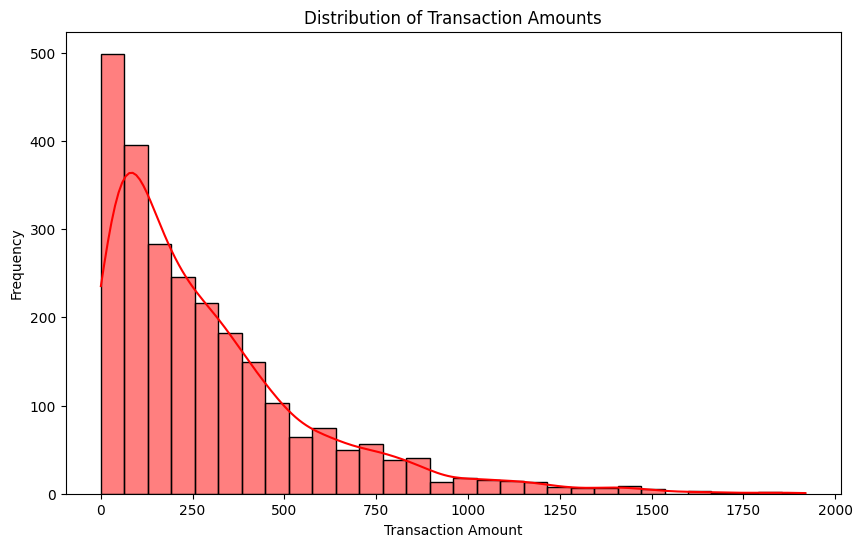

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=30, kde=True, color='red')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

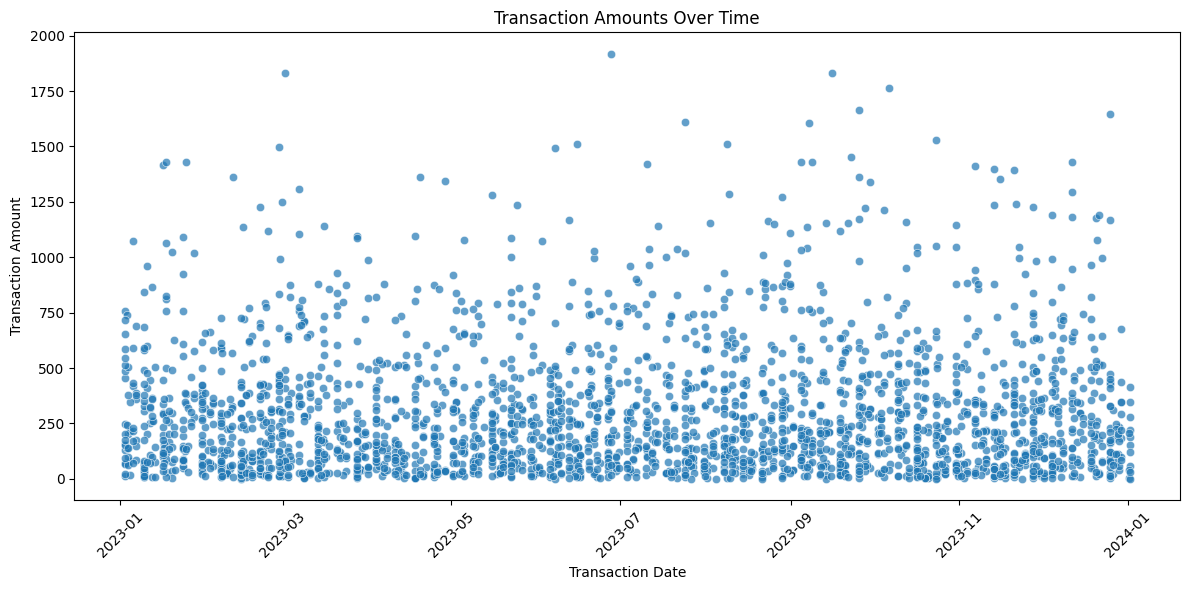

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='TransactionDate', y='TransactionAmount', alpha=0.7)
plt.title('Transaction Amounts Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

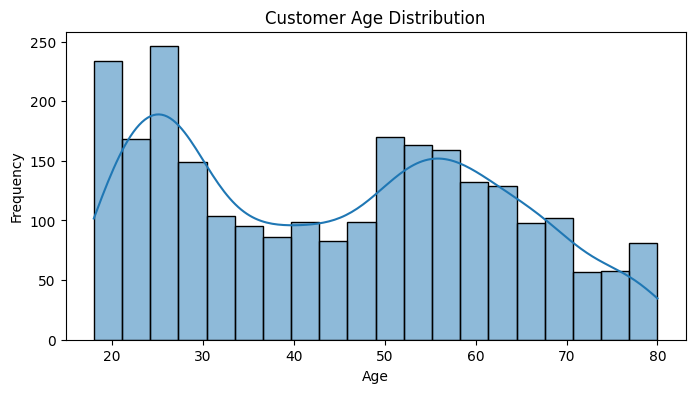

In [32]:
plt.figure(figsize=(8, 4))
sns.histplot(df['CustomerAge'], kde=True, bins=20)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

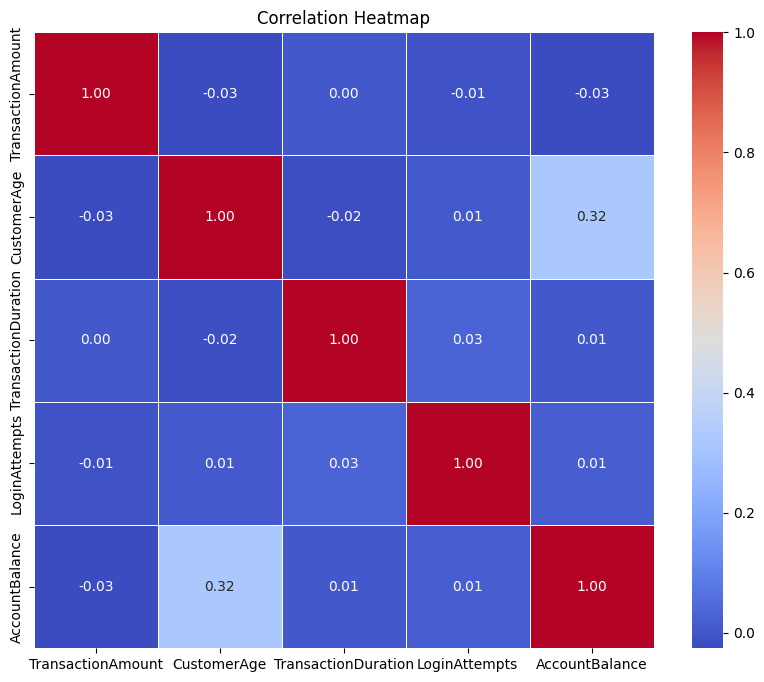

In [33]:
correlation_matrix = df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **DBSCAN**

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [35]:
features_dbscan = df[['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']]

In [36]:
scaler_dbscan = StandardScaler()
X_scaled_dbscan = scaler_dbscan.fit_transform(features_dbscan)

In [37]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled_dbscan)

In [38]:
cluster_labels = {
    -1: 'Fraud (Outliers)',
     0: 'Normal'
}

df['Cluster_Description'] = df['DBSCAN_Cluster'].map(cluster_labels)

color_map = {
    -1: 'red',
     0: 'blue'
}

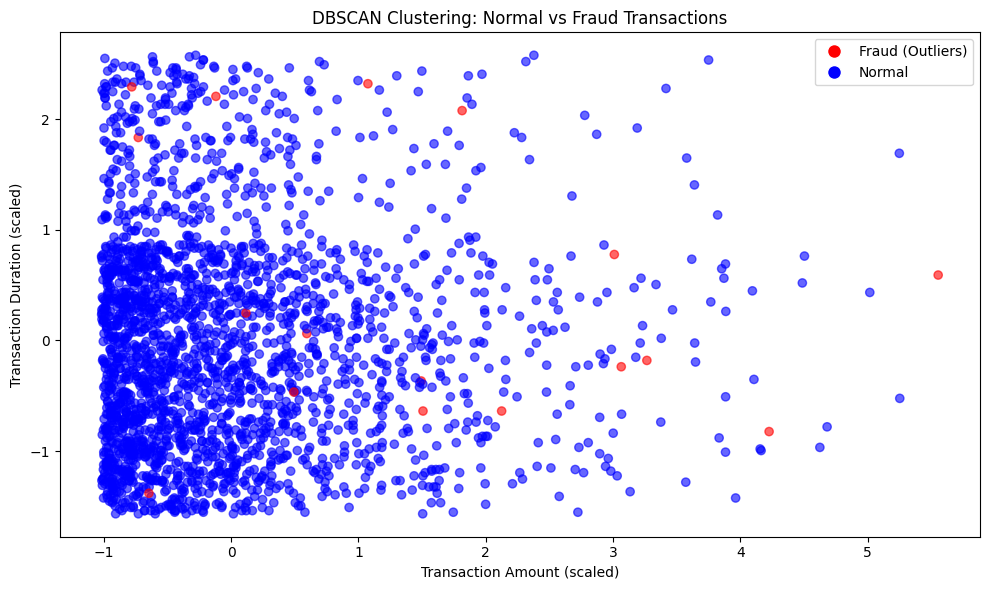

In [39]:
colors = df['DBSCAN_Cluster'].map(lambda x: color_map.get(x, 'gray'))

filtered_mask = df['DBSCAN_Cluster'].isin([-1, 0])
X_filtered = X_scaled_dbscan[filtered_mask]
colors_filtered = colors[filtered_mask]

plt.figure(figsize=(10, 6))
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=colors_filtered, alpha=0.6)
plt.title('DBSCAN Clustering: Normal vs Fraud Transactions')
plt.xlabel('Transaction Amount (scaled)')
plt.ylabel('Transaction Duration (scaled)')

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Fraud (Outliers)', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='blue', markersize=10)
]
plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

In [40]:
fraud_count = (df['DBSCAN_Cluster'] == -1).sum()
normal_count = (df['DBSCAN_Cluster'] == 0).sum()
total_count = len(df)

print("===== DBSCAN Clustering Summary =====")
print(f"Total transactions: {total_count}")
print(f"Normal transactions (Cluster 0): {normal_count}")
print(f"Fraudulent transactions (Outliers - Cluster -1): {fraud_count}")
print(f"Percentage of Fraudulent Transactions: {fraud_count / total_count * 100:.2f}%")

fraud_cases = df[df['DBSCAN_Cluster'] == -1]

===== DBSCAN Clustering Summary =====
Total transactions: 2512
Normal transactions (Cluster 0): 2389
Fraudulent transactions (Outliers - Cluster -1): 17
Percentage of Fraudulent Transactions: 0.68%


In [49]:
import numpy as np

new_transaction = np.array([[15000, 2.5, 30000, 1]])

new_transaction_scaled = scaler_dbscan.transform(new_transaction)

from sklearn.metrics import pairwise_distances

core_samples = dbscan.components_
distances = pairwise_distances(new_transaction_scaled, core_samples)

if np.any(distances <= dbscan.eps):
    print("Prediction:  Normal Transaction (within known cluster)")
else:
    print("Prediction:  Fraudulent Transaction (Outlier detected)")

Prediction:  Fraudulent Transaction (Outlier detected)


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

df['Fraud_Label'] = np.where(df['DBSCAN_Cluster'] == -1, 1, 0)  

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled_dbscan, df['Fraud_Label'])

new_transaction = np.array([[1000, 2.4, 3000, 5]])

new_transaction_scaled = scaler_dbscan.transform(new_transaction)

new_prediction = knn.predict(new_transaction_scaled)

if new_prediction[0] == 1:
    print("Prediction: 🚨 Fraudulent Transaction (Detected)")
else:
    print("Prediction: ✅ Normal Transaction (Safe)")


Prediction: 🚨 Fraudulent Transaction (Detected)
